**Spam-Ham Classification using Scikit Learn**

The scikit Learn portion contains inear regression model training using scikit learn.

All the questions in the **4.2-Task 02** are answered in the **Pytorch** section.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('SMSSpamCollection' , sep ='\t' ,header=None , names=['label','message'] )

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.sample(5)

,label,message
161,ham,Keep yourself safe for me because I need you a...
4715,ham,Oops i thk i dun haf enuff... I go check then ...
4393,ham,what are your new years plans?
5521,ham,You are a big chic. Common. Declare
2759,ham,What time. I‘m out until prob 3 or so


In [5]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
df.isnull().sum()

,0
label,0
message,0


In [7]:
df.duplicated().sum()

np.int64(403)

In [8]:
df.shape

(5572, 2)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(5169, 2)

In [12]:
df['label'].value_counts()

,count
label,
ham,4516
spam,653


<Axes: xlabel='count', ylabel='label'>

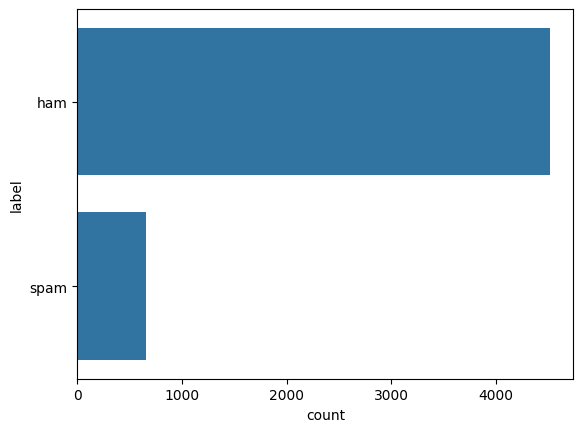

In [13]:
sns.countplot(df['label'])


In [14]:
df['label'] = df['label'].map({'ham':0 , 'spam': 1})

In [15]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_auc_score

In [17]:
X_train_scikit,X_test_scikit,y_train_scikit,y_test_scikit = train_test_split(df['message'],df['label'], test_size=0.2, random_state=42 )


In [18]:
X_train_scikit.shape,X_test_scikit.shape

((4135,), (1034,))

In [19]:
y_train_scikit.shape,y_test_scikit.shape

((4135,), (1034,))

In [20]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9)

X_train_vec = tfidf.fit_transform(X_train_scikit)
X_test_vec = tfidf.transform(X_test_scikit)


Sklearn uses Sigmoid function internally so when we use model.predict() It automatically applies the sigmoid function to the linear combination of inputs to produce a probability.

In [21]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_vec, y_train_scikit)
y_pred = model.predict(X_test_vec)

In [22]:
print(accuracy_score(y_test_scikit,y_pred))

0.9729206963249516


[[877  17]
 [ 11 129]]


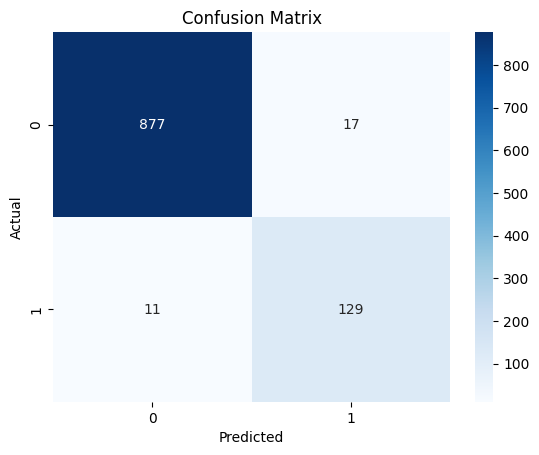

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_scikit, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
print(classification_report(y_test_scikit,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       894
           1       0.88      0.92      0.90       140

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034



**-------------------------------------------------------------------------PYTORCH--------------------------------------------------------------**

**Spam-Ham Classification Using PYTORCH.**

This Section contain model training using pytorch and answers to all questions given in the week-01 -- task-01.

**Pytorch Implementation**

All questions are answered in below cells.

In [25]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader,TensorDataset

Load the dataset using pd.read csv. How many rows and columns are in the dataset?
List the column names.

In [26]:
df1 = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Q1: How many rows and columns? What are the column names?
print(f"Dataset shape: {df1.shape}")
print(f"Number of rows: {df1.shape[0]}")
print(f"Number of columns: {df1.shape[1]}")
print(f"Column names: {list(df1.columns)}")
print("\nFirst 5 rows:")
df1.head()

Dataset shape: (5572, 2)
Number of rows: 5572
Number of columns: 2
Column names: ['label', 'message']

First 5 rows:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Preprocessing**

In [27]:
df1.duplicated().sum()

np.int64(403)

In [28]:
df1[df1['message'].duplicated()]

,label,message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [29]:
df1.drop_duplicates(inplace=True)

In [30]:
df1.shape

(5169, 2)

In [31]:
df1['label'].value_counts()

,count
label,
ham,4516
spam,653


<Axes: xlabel='count', ylabel='label'>

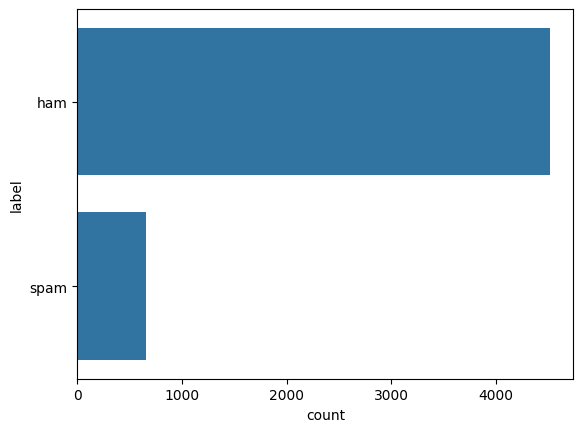

In [32]:
sns.countplot(df1['label'])

In [33]:
df1['label'] = df1['label'].map({'ham':0 , 'spam':1})

In [34]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [36]:
X_raw = df1['message']

In [37]:
X_raw

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [38]:
y_raw = df1['label'].values

In [39]:
y_raw

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
print(y_raw.dtype)

int64


In [41]:

# y_raw = y_raw.astype(np.int64)

Q4. Split the dataset into training (80%) and validation (20%) sets. What are the sizes of these
sets?

In [42]:
X_train_text, X_val_text, y_train_raw, y_val_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)

Now applying TFIDF to convert text to numbers

Q2. Preprocess the text data using TfidfVectorizer from scikit-learn.

What does TF-IDF represent, and why is it suitable for text data?
Answer:

TF-IDF (Term Frequency-Inverse Document Frequency) represents:
- TF: How frequently a term appears in a document
- IDF: How rare or common a term is across all documents
- It's suitable for text data because:
  1. It normalizes term frequencies
  2. It reduces the weight of common words
  3. It highlights distinctive words that are important for classification
  4. It converts text to numerical features that ML models can process


We apply TF-IDF or any data transformation (like scaling, encoding, etc.) after the train-test split to avoid a common and critical issue called data leakage.

Data leakage happens when information from outside the training dataset is used to create the model. This can lead to unrealistically high performance during training or validation — but the model performs poorly on real unseen data.

In [43]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = tfidf.fit_transform(X_train_text)  # fit_transform on training data
X_val_tfidf = tfidf.transform(X_val_text)

Q3. Convert the TF-IDF features and labels to PyTorch tensors. What is the shape of the
feature matrix?



In [44]:
X_train = torch.FloatTensor(X_train_tfidf.toarray())
X_val = torch.FloatTensor(X_val_tfidf.toarray())
y_train = torch.FloatTensor(y_train_raw)
y_val = torch.FloatTensor(y_val_raw)

print(f"Training feature matrix shape: {X_train.shape}")
print(f"Validation feature matrix shape: {X_val.shape}")
print(f"Training label tensor shape: {y_train.shape}")
print(f"Validation label tensor shape: {y_val.shape}")
print(f"Number of features (TF-IDF dimensions): {X_train.shape[1]}")

Training feature matrix shape: torch.Size([4135, 7318])
Validation feature matrix shape: torch.Size([1034, 7318])
Training label tensor shape: torch.Size([4135])
Validation label tensor shape: torch.Size([1034])
Number of features (TF-IDF dimensions): 7318


This is an additional step that we have to do to force/make the model to give more weightage or focus on certain class/category.

So we know that our dataset is imbalance and we have ham in majority and spam in minority. To avoid our model being biased toward one class we are doing this step.

This code calculates a pos_weight to handle class imbalance by giving more importance to the minority class (e.g., spam) during training. It's used in BCEWithLogitsLoss to ensure the model doesn't ignore rare classes.


In [45]:
from collections import Counter

counts = Counter(y_train_raw)
pos_weight = torch.tensor([counts[0] / counts[1]], dtype=torch.float32)
print(f"Calculated pos_weight (for spam): {pos_weight.item():.2f}")

Calculated pos_weight (for spam): 7.06


Q5. Create a DataLoader with batch size = 32. Print the first batch of inputs and
targets.

In [46]:
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")

# Print first batch
print("\nFirst batch details:")
for batch_idx, (inputs, targets) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"  Input shape: {inputs.shape}")
    print(f"  Target shape: {targets.shape}")
    print(f"  First 5 targets: {targets[:5]}")
    print(f"  Input sample (first 10 features): {inputs[0][:10]}")
    break

Training batches: 130
Validation batches: 33

First batch details:
Batch 1:
  Input shape: torch.Size([32, 7318])
  Target shape: torch.Size([32])
  First 5 targets: tensor([0., 0., 0., 0., 0.])
  Input sample (first 10 features): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


Q6. Define a SpamModel class using nn.Linear and sigmoid. Why is the sigmoid
function used for logistic regression?

I am using BCEWithLogitsLoss (torch.nn.BCEWithLogitsLoss combines sigmoid activation + binary cross entropy (BCE) in a numerically stable way.) implemented in Q7 part...

Sigmoid function explanation:
The sigmoid function is used for logistic regression because:
1. It maps any real number to a value between 0 and 1
2. This output can be interpreted as a probability
3. For binary classification: P(spam) = σ(wx + b)

In [47]:
print("\n=== QUESTION 6: Define SpamModel ===")
class SpamModel(nn.Module):
    def __init__(self, input_size):
        super(SpamModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.linear(x)

# Initialize model
input_size = X_train.shape[1]
model = SpamModel(input_size)

print(f"Model architecture:")
print(f"  Input size: {input_size}")
print(f"  Output size: 1")
print(f"  Model: {model}")



=== QUESTION 6: Define SpamModel ===
Model architecture:
  Input size: 7318
  Output size: 1
  Model: SpamModel(
  (linear): Linear(in_features=7318, out_features=1, bias=True)
)


Q7. Train the model for 100 epochs with lr = 1e-3 using BCELoss (Binary Cross-Entropy
Loss). Plot the validation loss over epochs

In [48]:
import torch.optim as optim

print("\n=== QUESTION 7: Train the Model ===")
# Training setup
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 150

# Training loop with validation tracking
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')


=== QUESTION 7: Train the Model ===
Epoch [10/150], Train Loss: 0.7447, Val Loss: 0.7608
Epoch [20/150], Train Loss: 0.4868, Val Loss: 0.5267
Epoch [30/150], Train Loss: 0.3437, Val Loss: 0.4009
Epoch [40/150], Train Loss: 0.2537, Val Loss: 0.3260
Epoch [50/150], Train Loss: 0.1924, Val Loss: 0.2789
Epoch [60/150], Train Loss: 0.1500, Val Loss: 0.2481
Epoch [70/150], Train Loss: 0.1193, Val Loss: 0.2276
Epoch [80/150], Train Loss: 0.0967, Val Loss: 0.2144
Epoch [90/150], Train Loss: 0.0790, Val Loss: 0.2056
Epoch [100/150], Train Loss: 0.0652, Val Loss: 0.2006
Epoch [110/150], Train Loss: 0.0548, Val Loss: 0.1981
Epoch [120/150], Train Loss: 0.0464, Val Loss: 0.1979
Epoch [130/150], Train Loss: 0.0413, Val Loss: 0.1988
Epoch [140/150], Train Loss: 0.0333, Val Loss: 0.2011
Epoch [150/150], Train Loss: 0.0288, Val Loss: 0.2038


Plotting the Training and Validation Loss after epochs.

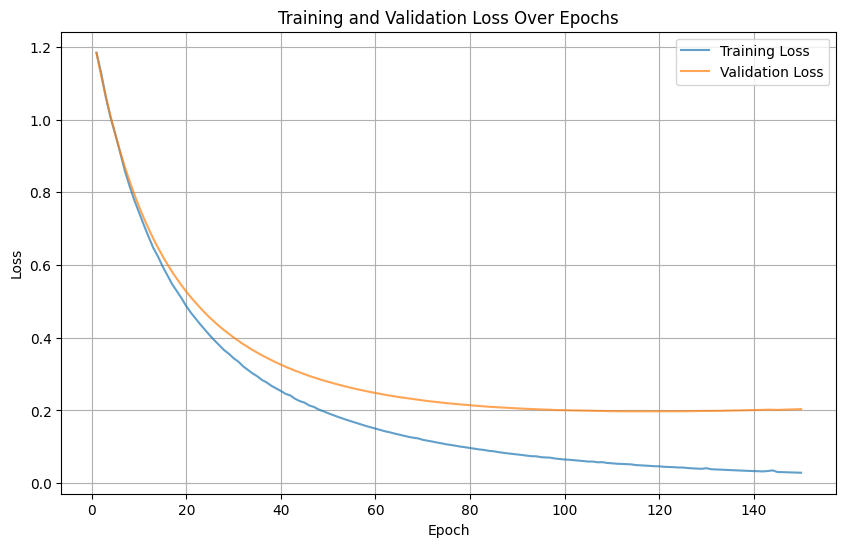

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', alpha=0.7)
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Q8. Evaluate the model on the validation set. Report accuracy, precision, recall, and AUC
metrics.


=== QUESTION 8: Model Evaluation ===
Validation Metrics:
  Accuracy: 0.9797
  Precision: 0.9220
  Recall: 0.9286
  AUC: 0.9930

Confusion Matrix:
[[883  11]
 [ 10 130]]


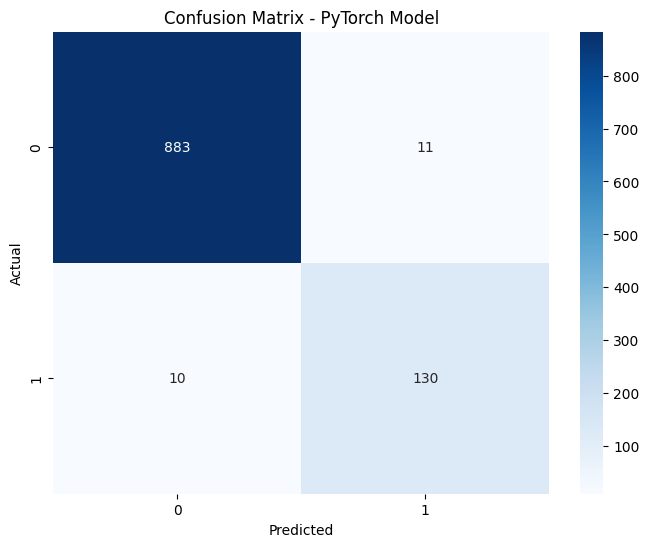


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       894
         1.0       0.92      0.93      0.93       140

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [50]:
print("\n=== QUESTION 8: Model Evaluation ===")
# Evaluate on validation set
model.eval()
all_predictions = []
all_probabilities = []
all_targets = []

with torch.no_grad():
    for inputs, targets in val_loader:
        logits = model(inputs).squeeze()
        probs = torch.sigmoid(logits)                     # Apply sigmoid to logits
        predictions = (probs > 0.5).float()

        all_predictions.extend(predictions.numpy())
        all_probabilities.extend(probs.numpy())
        all_targets.extend(targets.numpy())

# Convert to numpy arrays

all_predictions = np.array(all_predictions)
all_probabilities = np.array(all_probabilities)
all_targets = np.array(all_targets)

# Calculate metrics
accuracy = accuracy_score(all_targets, all_predictions)
precision = precision_score(all_targets, all_predictions)
recall = recall_score(all_targets, all_predictions)
auc = roc_auc_score(all_targets, all_probabilities)

print(f"Validation Metrics:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  AUC: {auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_targets, all_predictions)
print(f"\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - PyTorch Model')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(all_targets, all_predictions))



Q9. Make predictions for three validation samples. Compare predictions with actual labels

In [51]:
# ------------------------------------------------------
print("\n=== QUESTION 9: Sample Predictions ===")

sample_indices = [0, 1, 2]
sample_inputs = X_val[sample_indices]
sample_targets = y_val[sample_indices]

model.eval()
with torch.no_grad():
    logits = model(sample_inputs).squeeze()
    print("Raw logits:", logits.tolist())
    probs = torch.sigmoid(logits)
    print("Probabilities:", probs.tolist())
    sample_predictions = (probs > 0.5).float()

print("Sample Predictions:")
for i in range(3):
    actual = "Spam" if sample_targets[i].item() == 1 else "Ham"
    predicted = "Spam" if sample_predictions[i].item() == 1 else "Ham"
    probability = probs[i].item()

    print(f"Sample {i+1}:")
    print(f"  Actual: {actual}")
    print(f"  Predicted: {predicted}")
    print(f"  Probability: {probability:.4f}")
    print(f"  Correct: {'Yes' if sample_targets[i].item() == sample_predictions[i].item() else 'No'}")
    print()



=== QUESTION 9: Sample Predictions ===
Raw logits: [-10.243904113769531, 8.760683059692383, -5.548180103302002]
Probabilities: [3.5572425986174494e-05, 0.9998432397842407, 0.0038794297724962234]
Sample Predictions:
Sample 1:
  Actual: Ham
  Predicted: Ham
  Probability: 0.0000
  Correct: Yes

Sample 2:
  Actual: Spam
  Predicted: Spam
  Probability: 0.9998
  Correct: Yes

Sample 3:
  Actual: Ham
  Predicted: Ham
  Probability: 0.0039
  Correct: Yes



Q10. Discuss one challenge faced during preprocessing or training and how you addressed it.

Answer:

The challenge that i face was to handle imbalance in the dataset for both above Scikit Learn Logistic regression part and pytorch part. To solve this problem i studied multiple techniques for handling imbalance dataset such as Oversampling, Undersampling, SMOTE and Assigning Class weights.
All these techniques comes with advantages and disadvantages such as Undersampling solve the problem but with such big imbalance it will reduce the dataset size. Oversampling will increase duplicates as it solve imbalance by duplicating the minority class data points.
So i decided to opt the simplest technique of just assigning more class weights to minority class and when i check the metrics after training it solved my problem.
Another problem was using class weights were easy to use in Scikit-Learn Logistic Regression as compared to Pytorch as i am new to pytorch.


In [52]:
import joblib

In [53]:
print("1. Saving TF-IDF vectorizer...")
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("   ✅ TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")

1. Saving TF-IDF vectorizer...
   ✅ TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'


In [54]:
print("\n2. Saving PyTorch model...")
torch.save(model.state_dict(), 'spam_model_state_dict.pth')
print("   ✅ Model state dict saved as 'spam_model_state_dict.pth'")


2. Saving PyTorch model...
   ✅ Model state dict saved as 'spam_model_state_dict.pth'


**Inferencing by using the Saved model and vectorizer.**

In [55]:
import joblib
import torch
import torch.nn as nn

class SpamModel(nn.Module):
    def __init__(self, input_size):
        super(SpamModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))



tfidf_loaded = joblib.load('tfidf_vectorizer.pkl')

# Reconstruct model using TF-IDF input size
input_size = len(tfidf_loaded.get_feature_names_out())
model_loaded = SpamModel(input_size)



# Load weights
model_loaded.load_state_dict(torch.load('spam_model_state_dict.pth'))
model_loaded.eval()



# 5. Make predictions on new text
def predict_spam(text_message):
    # Preprocess the text
    text_tfidf = tfidf_loaded.transform([text_message])
    text_tensor = torch.FloatTensor(text_tfidf.toarray())

    # Make prediction
    with torch.no_grad():
        probability = model_loaded(text_tensor).item()
        prediction = "Spam" if probability > 0.5 else "Ham"

    return prediction, probability

In [56]:
print(predict_spam("Dear ali congratulation you have been shortlisted for interview on 15 july 2025 we are looking forward to meeting you in person"))

('Ham', 0.004338868428021669)


In [58]:
texts = [
    "Hello, are you free this weekend?",
    "URGENT! You have won $1000 cash prize. Claim now!",
    "Hey, just checking in.",
    "Win a free cruise to Bahamas. Call now!",
    "Hi, this is your bank. Please verify your PIN.",
    "Dear ali congratulation you have been shortlisted for interview on 15 july 2025 we are looking forward to meeting you in person"
]

for msg in texts:
    pred, prob = predict_spam(msg)
    print(f"Message: {msg}")
    print(f"  ➤ Prediction: {pred} | Probability: {prob:.4f}\n")


Message: Hello, are you free this weekend?
  ➤ Prediction: Spam | Probability: 0.5608

Message: URGENT! You have won $1000 cash prize. Claim now!
  ➤ Prediction: Spam | Probability: 0.9999

Message: Hey, just checking in.
  ➤ Prediction: Ham | Probability: 0.0116

Message: Win a free cruise to Bahamas. Call now!
  ➤ Prediction: Spam | Probability: 0.9219

Message: Hi, this is your bank. Please verify your PIN.
  ➤ Prediction: Ham | Probability: 0.2890

Message: Dear ali congratulation you have been shortlisted for interview on 15 july 2025 we are looking forward to meeting you in person
  ➤ Prediction: Ham | Probability: 0.0043

